In [1]:
## OS
import os

## Maths
import numpy as np

## Graphics
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

## DataFrames
import pandas as pd

## Sklearn

# preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# metrics
from sklearn.metrics import f1_score

# pipeline
from sklearn.pipeline import Pipeline

# models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset and preprocess it

In [48]:
## Load training and test dataset
train_df = pd.read_csv('dataset/train.csv', delimiter=',')
test_df = pd.read_csv('dataset/test.csv', delimiter=',')
sample_df = pd.read_csv('dataset/sample.csv', delimiter=',', header = None)
print(len(sample_df),len(test_df))

48000 48000


In [45]:
train_df

,Sequence,Active
0,DKWL,0
1,FCHN,0
2,KDQP,0
3,FNWI,0
4,NKRM,0
...,...,...
111995,GSME,0
111996,DLPT,0
111997,SGHC,0
111998,KIGT,0


In [46]:
test_df

,Sequence
0,HWFK
1,MWPW
2,ALDV
3,NTLG
4,LHYY
...,...
47995,NRWM
47996,MMMK
47997,AFNM
47998,CRYI


In [49]:
sample_df

,0
0,1
1,0
2,0
3,1
4,0
...,...
47995,0
47996,1
47997,0
47998,1


In [5]:
## Encoder for the dataframe
amino_acids = ["R", "H", "K", "D", "E", "S", "T", "N", "Q", "C", "U", "G", "P", "A", "I", "L", "M", "F", "W", "Y", "V"]
amino_acids_sorted = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


def label_encoding(df, amino_acids):

    ## Columns to be used for training
    training_columns = []
    
    ## Label encoder for the amino_acid
    amino_acids_encoding = { amino_acid: idx for idx, amino_acid in enumerate(amino_acids) }
    print(amino_acids_encoding)
    ## Make a column for each mutation
    for site_number in range(4):
        site_column = "site" + str(site_number+1)
        df[site_column] = df["Sequence"].apply(lambda x: x[site_number])
    
    ## Label encode each mutation column
    for site_number in range(4):
        site_column = "site" + str(site_number+1)
        site_column_encoded = "site" + str(site_number+1) + "_encoded"
        df[site_column_encoded] = df[site_column].apply(lambda x: amino_acids_encoding[x])
        training_columns.append(site_column_encoded)
        
    return training_columns


def one_hot_encoding(df, amino_acids):    
    
    ## Columns to be used for training
    training_columns = []
    
    ## Make a column for each mutation
    for site_number in range(4):
        site_column = "site" + str(site_number+1)
        df[site_column] = df["Sequence"].apply(lambda x: x[site_number])
        
    ## One hot encode all columns
    for site_number in range(4):
        column = "site" + str(site_number+1)
        for amino_acid in amino_acids:
            new_column = column + "_" + amino_acid
            df[new_column] = (df[column] == amino_acid).astype(int)
            training_columns.append(new_column)
    
    return training_columns


# def one_hot_encoding(df, amino_acids):    
#     ## Make a column for each mutation
#     columns_to_transform = []
#     for site_number in range(4):
#         site_column = "site"+str(site_number+1)
#         df[site_column] = df["Sequence"].apply(lambda x: x[site_number])
#         columns_to_transform.append(site_column)

#     ## One hot encode all columns
#     encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#     encoded = encoder.fit_transform(df[columns_to_transform])
    
#     ## One-hot encoding removed index, put it back
#     df = pd.DataFrame(encoded, index=df.index)
#     return df

In [6]:
train_df_label = train_df.copy()
training_columns_label = label_encoding(train_df_label, amino_acids)
train_df_label


{'R': 0, 'H': 1, 'K': 2, 'D': 3, 'E': 4, 'S': 5, 'T': 6, 'N': 7, 'Q': 8, 'C': 9, 'U': 10, 'G': 11, 'P': 12, 'A': 13, 'I': 14, 'L': 15, 'M': 16, 'F': 17, 'W': 18, 'Y': 19, 'V': 20}


,Sequence,Active,site1,site2,site3,site4,site1_encoded,site2_encoded,site3_encoded,site4_encoded
0,DKWL,0,D,K,W,L,3,2,18,15
1,FCHN,0,F,C,H,N,17,9,1,7
2,KDQP,0,K,D,Q,P,2,3,8,12
3,FNWI,0,F,N,W,I,17,7,18,14
4,NKRM,0,N,K,R,M,7,2,0,16
...,...,...,...,...,...,...,...,...,...,...
111995,GSME,0,G,S,M,E,11,5,16,4
111996,DLPT,0,D,L,P,T,3,15,12,6
111997,SGHC,0,S,G,H,C,5,11,1,9
111998,KIGT,0,K,I,G,T,2,14,11,6


In [7]:
train_df_one_hot = train_df.copy()
training_columns_one_hot = one_hot_encoding(train_df_one_hot, amino_acids)
train_df_one_hot

test_df_one_hot = test_df.copy()
testing_columns_one_hot = one_hot_encoding(test_df_one_hot, amino_acids)
test_df_one_hot

,Sequence,site1,site2,site3,site4,site1_R,site1_H,site1_K,site1_D,site1_E,...,site4_G,site4_P,site4_A,site4_I,site4_L,site4_M,site4_F,site4_W,site4_Y,site4_V
0,HWFK,H,W,F,K,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MWPW,M,W,P,W,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,ALDV,A,L,D,V,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,NTLG,N,T,L,G,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,LHYY,L,H,Y,Y,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,NRWM,N,R,W,M,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47996,MMMK,M,M,M,K,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,AFNM,A,F,N,M,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47998,CRYI,C,R,Y,I,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
#print(len(train_df_one_hot[train_df_one_hot['Active'] == 0])*1)
#print(len(train_df_one_hot[train_df_one_hot['Active'] == 1])*26)

# Weights to balance the problem (as option in model.fit)
class_weights = {0: 1, 1:26}

In [9]:
## Make features and predictions datasets
X_label = train_df_label[training_columns_label]
X_one_hot = train_df_one_hot[training_columns_one_hot]
y = train_df_one_hot["Active"]

X_test_one_hot = test_df_one_hot[testing_columns_one_hot]

In [10]:
train_df_one_hot

,Sequence,Active,site1,site2,site3,site4,site1_R,site1_H,site1_K,site1_D,...,site4_G,site4_P,site4_A,site4_I,site4_L,site4_M,site4_F,site4_W,site4_Y,site4_V
0,DKWL,0,D,K,W,L,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,FCHN,0,F,C,H,N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,KDQP,0,K,D,Q,P,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,FNWI,0,F,N,W,I,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,NKRM,0,N,K,R,M,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111995,GSME,0,G,S,M,E,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111996,DLPT,0,D,L,P,T,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
111997,SGHC,0,S,G,H,C,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111998,KIGT,0,K,I,G,T,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df_one_hot

,Sequence,site1,site2,site3,site4,site1_R,site1_H,site1_K,site1_D,site1_E,...,site4_G,site4_P,site4_A,site4_I,site4_L,site4_M,site4_F,site4_W,site4_Y,site4_V
0,HWFK,H,W,F,K,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MWPW,M,W,P,W,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,ALDV,A,L,D,V,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,NTLG,N,T,L,G,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,LHYY,L,H,Y,Y,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,NRWM,N,R,W,M,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47996,MMMK,M,M,M,K,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,AFNM,A,F,N,M,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47998,CRYI,C,R,Y,I,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:

X_test_one_hot


,site1_R,site1_H,site1_K,site1_D,site1_E,site1_S,site1_T,site1_N,site1_Q,site1_C,...,site4_G,site4_P,site4_A,site4_I,site4_L,site4_M,site4_F,site4_W,site4_Y,site4_V
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
47996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# NN

In [13]:
## Train test split and normalisation

# train test split
#X_train_one_hot, X_validation_one_hot, y_train, y_validation = train_test_split(X_one_hot, y, train_size=0.80)
X_train_label, X_validation_label, X_train_one_hot, X_validation_one_hot, y_train, y_validation \
    = train_test_split(X_label, X_one_hot, y, train_size=0.80)
#, y_train_one_hot, y_validation_one_hot = train_test_split(X_one_hot, y, train_size=0.10)

# Normalise label encoded dataset
std_scaler = StandardScaler().fit(X_train_label)
X_train_label = std_scaler.transform(X_train_label)
X_validation_label = std_scaler.transform(X_validation_label)

# One hot encoded dataset is already normalised (min max normalisation) by construction

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.constraints import unit_norm

In [15]:
# Easy Model 

activation = 'relu'
input  = Input((X_train_one_hot.shape[1],))
layer  = Dense(64, activation=activation   , name='dense1')(input)
layer  = Dense(12, activation=activation   , name='dense2')(layer)
output = Dense(  1, activation='sigmoid', name='output', )(layer)

model = Model(input, output)

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['acc','mae'],
)

history = model.fit(X_train_one_hot, y_train,validation_data = (X_validation_one_hot,y_validation), class_weight=class_weights, epochs=20, batch_size=64)

Epoch 1/20
1400/1400 [==============================] - 2s 1ms/step - loss: 0.6750 - acc: 0.9093 - mae: 0.2216 - val_loss: 0.1490 - val_acc: 0.9375 - val_mae: 0.0797
Epoch 2/20
1400/1400 [==============================] - 1s 854us/step - loss: 0.2310 - acc: 0.9417 - mae: 0.0740 - val_loss: 0.1020 - val_acc: 0.9573 - val_mae: 0.0536
Epoch 3/20
1400/1400 [==============================] - 1s 863us/step - loss: 0.1607 - acc: 0.9594 - mae: 0.0503 - val_loss: 0.0964 - val_acc: 0.9629 - val_mae: 0.0437
Epoch 4/20
1400/1400 [==============================] - 1s 858us/step - loss: 0.1218 - acc: 0.9686 - mae: 0.0378 - val_loss: 0.0771 - val_acc: 0.9686 - val_mae: 0.0362
Epoch 5/20
1400/1400 [==============================] - 1s 948us/step - loss: 0.1040 - acc: 0.9727 - mae: 0.0327 - val_loss: 0.0828 - val_acc: 0.9679 - val_mae: 0.0358
Epoch 6/20
1400/1400 [==============================] - 1s 840us/step - loss: 0.0934 - acc: 0.9763 - mae: 0.0281 - val_loss: 0.0932 - val_acc: 0.9666 - val_mae: 0

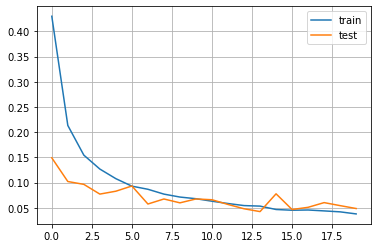

In [16]:
# loss plot
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plt.yscale('log')
center = min(history.history['val_loss'] + history.history['loss'])
plt.grid(True)

plt.show()

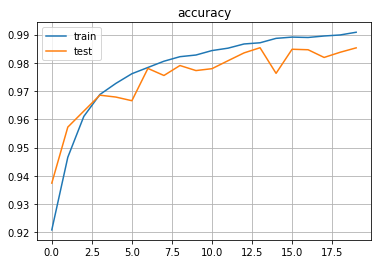

In [17]:
# plot accuracy trends for train and validation sample
plt.title('accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
center = max(history.history['val_acc'] +  history.history['acc'])
# plt.yscale('log')
plt.grid(True)
plt.show()

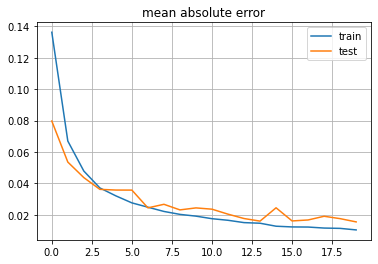

In [18]:
# plot accuracy trends for train and validation sample
plt.title('mean absolute error')
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
center = min(history.history['val_mae'] + history.history['mae'])
# plt.yscale('log')
plt.grid(True)

plt.show()



In [19]:
y_pred = model.predict(X_validation_one_hot)

y_pred

array([[3.1734271e-22],
       [1.0536825e-09],
       [6.7578258e-16],
       ...,
       [3.9701859e-26],
       [3.5440424e-27],
       [2.9781901e-16]], dtype=float32)

In [20]:
# we need to choose a cut (with the ROC curve? for now I did it in this easy way)
step = 0.01
cut = 0
for i in range(0,110):
    y_pred_binary = [1 if item>cut else 0 for item in y_pred ]
    print("F1 score: %.3f with cut: %s" %(f1_score(y_validation, y_pred_binary),cut))
    cut += step


F1 score: 0.073 with cut: 0
F1 score: 0.714 with cut: 0.01
F1 score: 0.734 with cut: 0.02
F1 score: 0.748 with cut: 0.03
F1 score: 0.755 with cut: 0.04
F1 score: 0.759 with cut: 0.05
F1 score: 0.766 with cut: 0.060000000000000005
F1 score: 0.767 with cut: 0.07
F1 score: 0.770 with cut: 0.08
F1 score: 0.774 with cut: 0.09
F1 score: 0.777 with cut: 0.09999999999999999
F1 score: 0.780 with cut: 0.10999999999999999
F1 score: 0.782 with cut: 0.11999999999999998
F1 score: 0.784 with cut: 0.12999999999999998
F1 score: 0.788 with cut: 0.13999999999999999
F1 score: 0.791 with cut: 0.15
F1 score: 0.793 with cut: 0.16
F1 score: 0.795 with cut: 0.17
F1 score: 0.797 with cut: 0.18000000000000002
F1 score: 0.798 with cut: 0.19000000000000003
F1 score: 0.799 with cut: 0.20000000000000004
F1 score: 0.801 with cut: 0.21000000000000005
F1 score: 0.803 with cut: 0.22000000000000006
F1 score: 0.804 with cut: 0.23000000000000007
F1 score: 0.807 with cut: 0.24000000000000007
F1 score: 0.808 with cut: 0.2500

In [21]:
# choose best cut
cut = 0.93
y_pred_binary = [1 if item>cut else 0 for item in y_pred ]
print("F1 score: %.3f with cut: %s" %(f1_score(y_validation, y_pred_binary),cut))

F1 score: 0.871 with cut: 0.93


In [24]:
# Apply chosen cut
y_test_pred = model.predict(X_test_one_hot)
y_submit = [1 if item>cut else 0 for item in y_test_pred ]

In [51]:
# Submit --> header None
df = pd.DataFrame(y_submit)
df.to_csv('prediction.csv', index=False, header = None, float_format='%.0f')

In [ ]:
##################################

In [14]:
## More Complex Model 
activation = 'relu'
input  = Input((X_train_one_hot.shape[1],))
layer  = Dense(256, activation=activation   , name='dense1', kernel_constraint=unit_norm())(input)
#         layer  = Dropout(0., name='dropout1')(layer)
layer  = BatchNormalization()(layer)
layer  = Dense(64, activation=activation   , name='dense2', kernel_constraint=unit_norm())(layer)
layer  = Dropout(0.3, name='dropout2')(layer)
layer  = BatchNormalization()(layer)
layer  = Dense(64, activation=activation   , name='dense3', kernel_constraint=unit_norm())(layer)
layer  = Dropout(0.4, name='dropout3')(layer)
layer  = BatchNormalization()(layer)
layer  = Dense(64, activation=activation   , name='dense4', kernel_constraint=unit_norm())(layer)
layer  = Dropout(0.5, name='dropout4')(layer)
layer  = BatchNormalization()(layer)
layer  = Dense(64, activation=activation   , name='dense5', kernel_constraint=unit_norm())(layer)
layer  = Dropout(0.8, name='dropout5')(layer)
layer  = BatchNormalization()(layer)
output = Dense(  1, activation='sigmoid', name='output', )(layer)

model = Model(input, output)

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['acc','mae'],
)

history = model.fit(X_train_one_hot, y_train,validation_data = (X_validation_one_hot,y_validation), epochs=50, batch_size=32)

Epoch 1/50
2800/2800 [==============================] - 6s 2ms/step - loss: 0.2781 - acc: 0.8968 - mae: 0.1629 - val_loss: 0.0781 - val_acc: 0.9698 - val_mae: 0.0520
Epoch 2/50
2800/2800 [==============================] - 5s 2ms/step - loss: 0.1048 - acc: 0.9624 - mae: 0.0588 - val_loss: 0.0600 - val_acc: 0.9761 - val_mae: 0.0316
Epoch 3/50
2800/2800 [==============================] - 5s 2ms/step - loss: 0.0873 - acc: 0.9622 - mae: 0.0510 - val_loss: 0.0641 - val_acc: 0.9777 - val_mae: 0.0296
Epoch 4/50
2800/2800 [==============================] - 5s 2ms/step - loss: 0.0793 - acc: 0.9627 - mae: 0.0488 - val_loss: 0.0540 - val_acc: 0.9820 - val_mae: 0.0248
Epoch 5/50
2800/2800 [==============================] - 5s 2ms/step - loss: 0.0757 - acc: 0.9649 - mae: 0.0456 - val_loss: 0.0806 - val_acc: 0.9809 - val_mae: 0.0249
Epoch 6/50
2800/2800 [==============================] - 5s 2ms/step - loss: 0.0697 - acc: 0.9686 - mae: 0.0424 - val_loss: 0.0823 - val_acc: 0.9818 - val_mae: 0.0256
Epoc

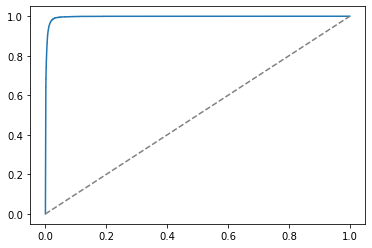

In [25]:
#ROC ??
from sklearn.metrics import roc_curve, roc_auc_score
from itertools import product
# let sklearn do the heavy lifting and compute the ROC curves for you
predictions = model.predict(X_one_hot) 
fpr, tpr, wps = roc_curve(y, predictions) 
plt.plot(fpr, tpr)
xy = [i*j for i,j in product([10.**i for i in range(-8, 0)], [1,2,4,8])]+[1]
plt.plot(xy, xy, color='grey', linestyle='--')
plt.yscale('linear')